In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_Salary,Company_txt,job_state,same_state,Age,python_ya,r studio,spark_ya,aws_ya,excel_ya
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,48,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,37,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,11,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,56,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,23,1,0,0,0,1


In [10]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    


In [11]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [12]:
df['job_simp'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [13]:
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [15]:
df['job_state'] = df.job_state.apply(lambda x:x.strip() if x.strip().lower()!='los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
UT     10
IN     10
WI     10
AZ      9
MO      9
AL      8
GA      6
KY      6
MI      6
DE      6
IA      5
CT      5
OR      4
NE      4
LA      4
KS      3
NM      3
ID      2
MN      2
SC      1
RI      1
Name: job_state, dtype: int64

In [17]:
df['desc_length'] = df['Job Description'].apply(lambda x:len(x))
df['desc_length']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_length, Length: 742, dtype: int64

In [18]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_Salary', 'max_Salary', 'avg_Salary',
       'Company_txt', 'job_state', 'same_state', 'Age', 'python_ya',
       'r studio', 'spark_ya', 'aws_ya', 'excel_ya', 'job_simp', 'seniority',
       'desc_length'],
      dtype='object')

In [19]:
df['No_of_Competitors'] = df['Competitors'].apply(lambda x:len(x.split(',')) if x!='-1' else 0)
df['No_of_Competitors']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: No_of_Competitors, Length: 742, dtype: int64

In [20]:
df['No_of_Competitors'].value_counts()

0    460
3    228
2     41
1     12
4      1
Name: No_of_Competitors, dtype: int64

In [21]:
#hourly wage in Annual wage
df['min_Salary'] = df.apply(lambda x:x.min_Salary*2 if x.hourly==1 else x.min_Salary,axis=1)

In [22]:
df[df.hourly==1][['hourly','min_Salary','max_Salary']]

,hourly,min_Salary,max_Salary
165,1,34,24
177,1,42,34
197,1,36,25
202,1,42,34
210,1,30,25
246,1,34,24
271,1,42,34
337,1,36,25
345,1,48,39
357,1,42,34


In [23]:
df['max_Salary'] = df.apply(lambda x:x.max_Salary*2 if x.hourly==1 else x.max_Salary,axis=1)

In [26]:
df.Company_txt = df.Company_txt.apply(lambda x:x.replace('\n',''))

In [28]:
df.describe()

,Rating,Founded,hourly,employer provided,min_Salary,max_Salary,avg_Salary,same_state,Age,python_ya,r studio,spark_ya,aws_ya,excel_ya,desc_length,No_of_Competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,47.524259,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.839080,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


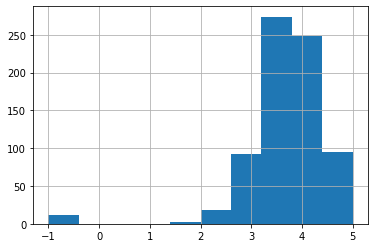

In [29]:
df.Rating.hist()

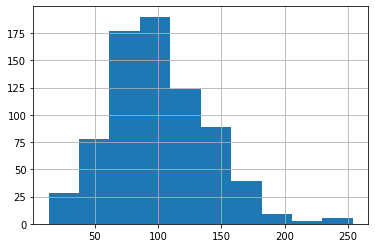

In [30]:
df.avg_Salary.hist()

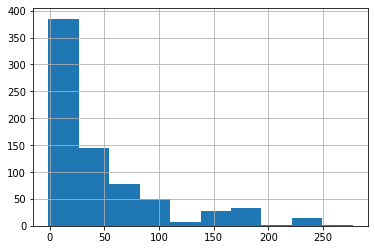

In [32]:
df.Age.hist()

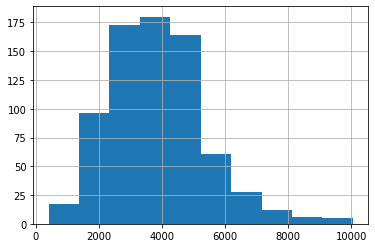

In [33]:
df.desc_length.hist()

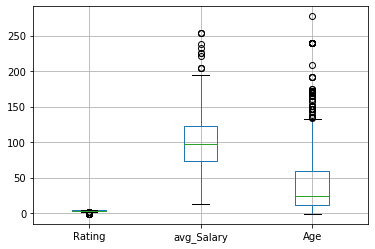

In [37]:
df.boxplot(column=['Rating','avg_Salary','Age'])

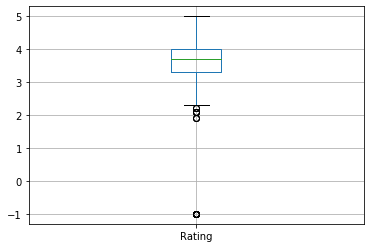

In [39]:
df.boxplot(column=['Rating'])

In [40]:
df[['Age','avg_Salary','Rating','desc_length']].corr()

,Age,avg_Salary,Rating,desc_length
Age,1.000000,0.019574,0.023162,0.164188
avg_Salary,0.019574,1.000000,0.013492,0.078808
Rating,0.023162,0.013492,1.000000,-0.012281
desc_length,0.164188,0.078808,-0.012281,1.000000


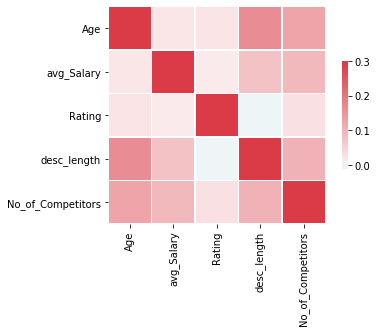

In [45]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['Age','avg_Salary','Rating','desc_length','No_of_Competitors']].corr(),vmax=.3,center=0,cmap=cmap,square=True,linewidth=.5,cbar_kws={'shrink':.5})

In [46]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_Salary', 'max_Salary', 'avg_Salary',
       'Company_txt', 'job_state', 'same_state', 'Age', 'python_ya',
       'r studio', 'spark_ya', 'aws_ya', 'excel_ya', 'job_simp', 'seniority',
       'desc_length', 'No_of_Competitors'],
      dtype='object')

In [47]:
df_catg = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','Company_txt','job_state','same_state','python_ya',
       'r studio', 'spark_ya', 'aws_ya', 'excel_ya','job_simp', 'seniority']]

Graph for Location: total = 200


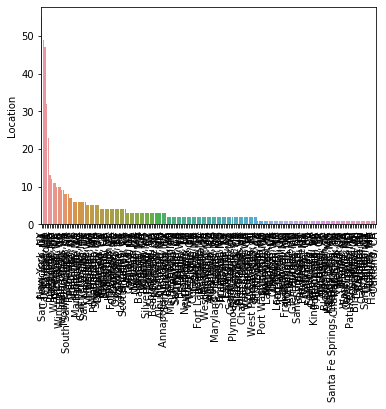

Graph for Headquarters: total = 198


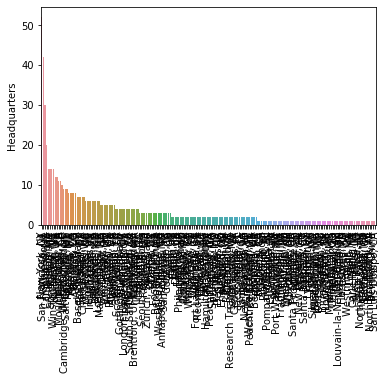

Graph for Size: total = 9


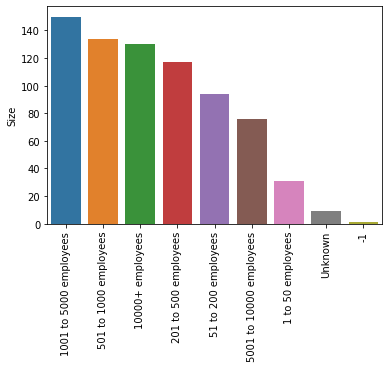

Graph for Type of ownership: total = 11


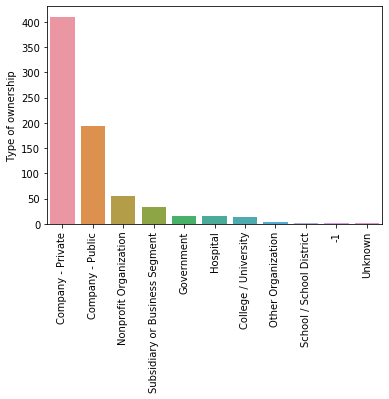

Graph for Industry: total = 60


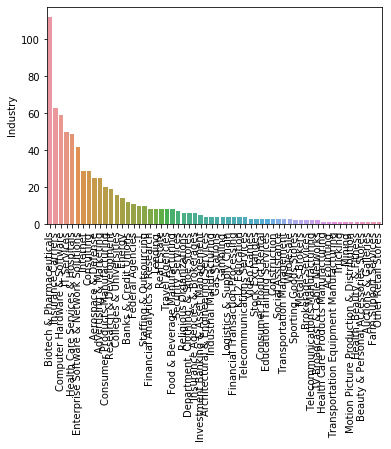

Graph for Sector: total = 25


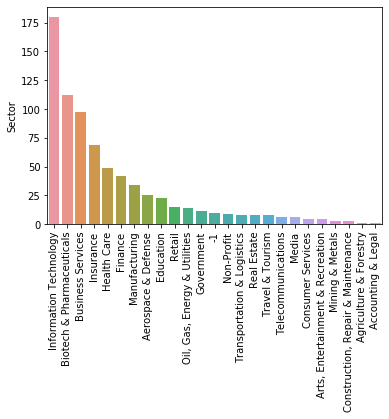

Graph for Revenue: total = 14


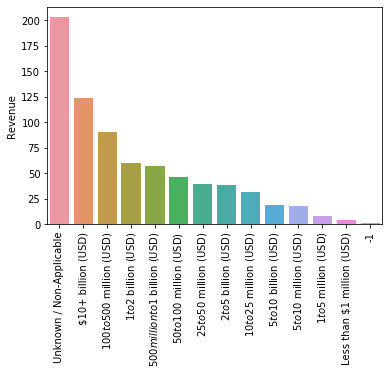

Graph for Company_txt: total = 343


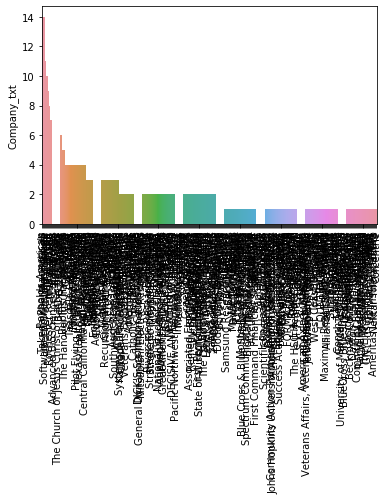

Graph for job_state: total = 37


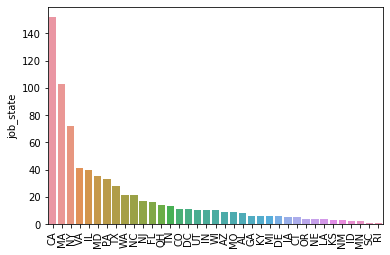

Graph for same_state: total = 2


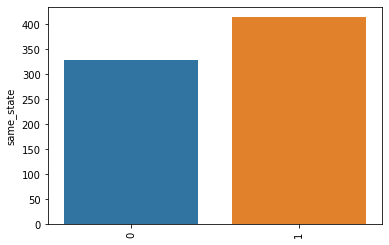

Graph for python_ya: total = 2


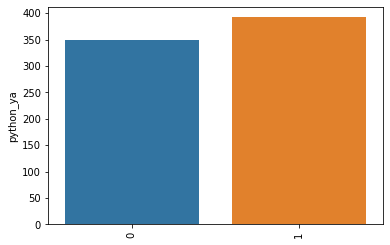

Graph for r studio: total = 2


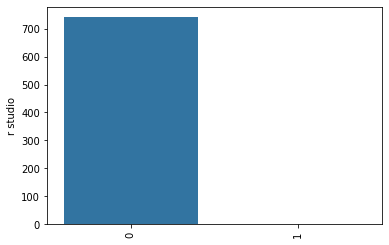

Graph for spark_ya: total = 2


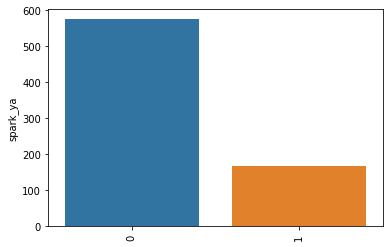

Graph for aws_ya: total = 2


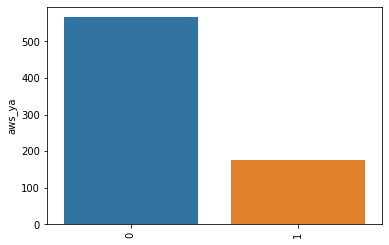

Graph for excel_ya: total = 2


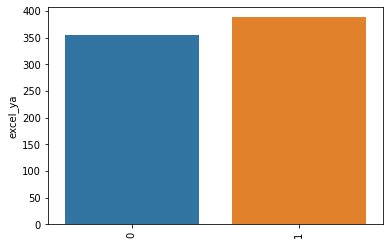

Graph for job_simp: total = 7


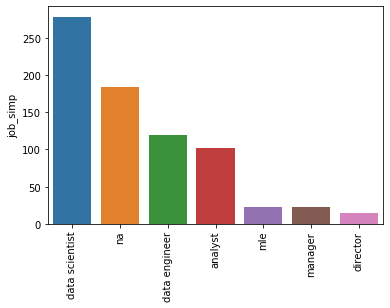

Graph for seniority: total = 3


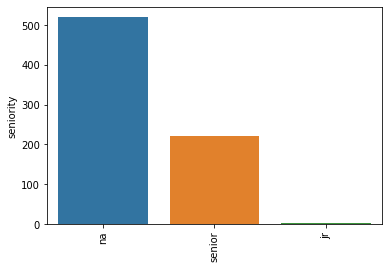

In [53]:
for i in df_catg.columns:
    print('Graph for %s: total = %d'%(i,len(df_catg[i].value_counts())))
    chart = sns.barplot(x=df_catg[i].value_counts().index, y=df_catg[i].value_counts())
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

Graph for Location: total = 20


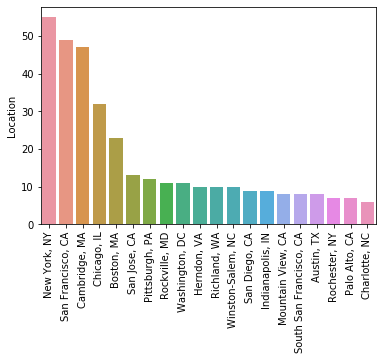

Graph for Headquarters: total = 20


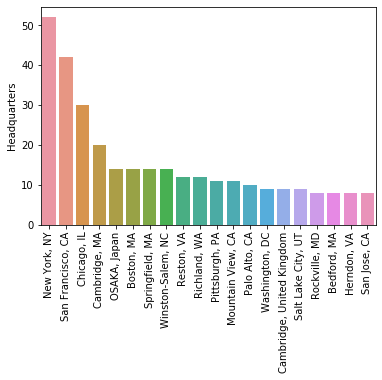

Graph for Company_txt: total = 20


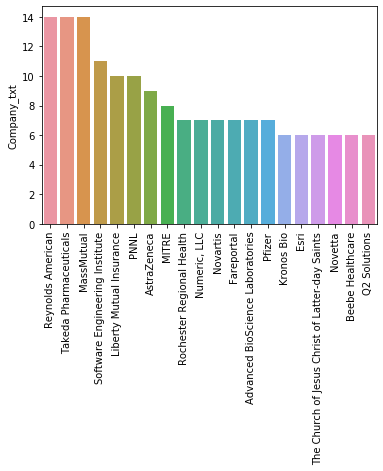

In [56]:
for i in df_catg[['Location','Headquarters','Company_txt']]:
    print('Graph for %s: total = %d'%(i,len(df_catg[i].value_counts()[:20])))
    chart = sns.barplot(x=df_catg[i].value_counts()[:20].index, y=df_catg[i].value_counts()[:20])
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [59]:
pd.pivot_table(df,index ='job_simp',values='avg_Salary')

,avg_Salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [60]:
pd.pivot_table(df,index=['job_simp','seniority'],values = 'avg_Salary')

avg_Salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [67]:
pd.pivot_table(df,index = ['job_state','job_simp'],values='avg_Salary', aggfunc = 'count').sort_values('job_state',ascending=False)

avg_Salary
job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [65]:
pd.set_option('display.max_rows',None)

In [69]:
pd.pivot_table(df[df.job_simp=='data scientist'],index = 'job_state',values='avg_Salary').sort_values('avg_Salary',ascending=False)

,avg_Salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [70]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_Salary', 'max_Salary', 'avg_Salary',
       'Company_txt', 'job_state', 'same_state', 'Age', 'python_ya',
       'r studio', 'spark_ya', 'aws_ya', 'excel_ya', 'job_simp', 'seniority',
       'desc_length', 'No_of_Competitors'],
      dtype='object')

In [73]:
df_pivot = df[['Type of ownership', 'Industry', 'Sector', 'Revenue', 'No_of_Competitors','hourly', 'employer provided','python_ya',
       'r studio', 'spark_ya', 'aws_ya', 'excel_ya','avg_Salary']]

In [75]:
for i in df_pivot.columns:
    print(i)
    print(pd.pivot_table(df_pivot,index=i,values = 'avg_Salary').sort_values('avg_Salary',ascending=False))

Type of ownership
                                avg_Salary
Type of ownership                         
-1                              117.500000
Company - Public                110.893782
Subsidiary or Business Segment  110.573529
College / University            107.615385
Company - Private               101.776829
Government                       84.300000
School / School District         77.750000
Other Organization               77.500000
Nonprofit Organization           68.281818
Hospital                         54.000000
Unknown                          39.500000
Industry
                                          avg_Salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services               131.500000
Brokerage Services                        1

ValueError: Grouper for 'avg_Salary' not 1-dimensional

In [76]:
pd.pivot_table(df_pivot, index='Revenue',columns='python_ya',values='avg_Salary',aggfunc='count')

python_ya,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [79]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

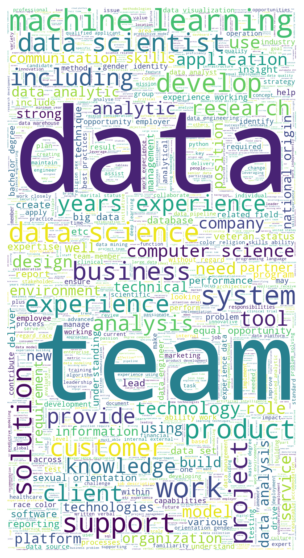

In [92]:
words = " ".join(df['Job Description'])
def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

word_filtered = punctuation_stop(words)

text = " ".join([ele for ele in word_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()